In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/Aditya Kyatham/Documents/BE FINAL/nsl-kdd/NSL_KDD-master/my.csv", index_col=None)

In [3]:
df.head()

,duration,"""protocol_type""","""service""","""flag""","""src_bytes""","""dst_bytes""","""land""","""wrong_fragment""","""urgent""","""hot""",...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_diff_srv_rate.1,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,e
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [4]:
df.shape

(148514, 43)

In [5]:
y = df["label"].values
from collections import Counter
#num = Counter(y)
#n=num.get('normal')
Counter(y)

Counter({'normal': 77052,
         'neptune': 45870,
         'warezclient': 890,
         'ipsweep': 3740,
         'portsweep': 3088,
         'teardrop': 904,
         'nmap': 1566,
         'satan': 4368,
         'smurf': 3311,
         'pod': 242,
         'back': 1315,
         'guess_passwd': 1284,
         'ftp_write': 11,
         'multihop': 25,
         'rootkit': 23,
         'buffer_overflow': 50,
         'imap': 12,
         'warezmaster': 964,
         'phf': 6,
         'land': 25,
         'loadmodule': 11,
         'spy': 2,
         'perl': 5,
         'saint': 319,
         'mscan': 996,
         'apache2': 737,
         'snmpgetattack': 178,
         'processtable': 685,
         'httptunnel': 133,
         'ps': 15,
         'snmpguess': 331,
         'mailbomb': 293,
         'named': 17,
         'sendmail': 14,
         'xterm': 13,
         'worm': 2,
         'xlock': 9,
         'xsnoop': 4,
         'sqlattack': 2,
         'udpstorm': 2})

In [7]:
from sklearn.preprocessing import LabelEncoder
encodings = dict()
for c in df.columns:
    #print df[c].dtype
    if df[c].dtype == "object":
        encodings[c] = LabelEncoder() #to give numerical label to char type labels.
        encodings[c]
        df[c] = encodings[c].fit_transform(df[c])

In [8]:
y = df.pop("label").values
X = df.values

In [9]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()


C:\Users\Aditya Kyatham\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Aditya Kyatham\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [10]:
from sklearn.preprocessing import StandardScaler #normalization
X = StandardScaler().fit_transform(X)

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
%matplotlib inline 
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDfX = pd.DataFrame(data = principalComponents)

In [23]:
principalDfX[:][0]

0         0.164177
1         3.630365
2        -2.420946
3        -2.234218
4         3.247595
5         3.780995
6         3.600570
7         3.870846
8         3.703232
9         3.514535
10        3.864684
11       -2.862115
12       -2.621314
13        3.882399
14        3.490110
15       -2.581923
16       -3.537928
17       -2.606916
18       -2.527018
19        3.622443
20        3.899175
21       -2.648925
22       -0.503274
23        3.875407
24       -0.302755
25        3.999524
26       -2.353003
27       -2.207467
28       -2.164662
29       -3.687096
            ...   
148484   -0.840934
148485    1.064610
148486   -2.632476
148487   -0.516454
148488   -2.438945
148489    0.887442
148490    4.005270
148491    0.697892
148492   -2.251035
148493   -2.570839
148494   -0.948272
148495   -0.228046
148496   -2.709050
148497   -2.832040
148498   -2.829510
148499   -0.785112
148500    3.554442
148501    4.021761
148502   -2.219440
148503   -2.571722
148504    3.598303
148505   -2.

Text(0, 0.5, 'Second Principal Component')

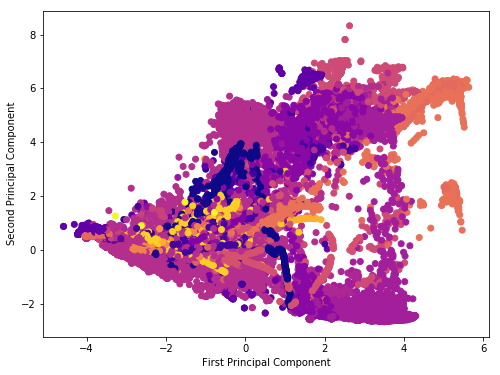

In [24]:
# giving a larger plot 
plt.figure(figsize =(8, 6)) 
  
plt.scatter(principalDfX[:][0], principalDfX[:][1],c = y, cmap ='plasma') 
  
# labeling x and y axes 
plt.xlabel('First Principal Component') 
plt.ylabel('Second Principal Component') 


In [25]:
principalDfX.head()
print(Counter(y))

Counter({16: 77052, 14: 45870, 25: 4368, 7: 3740, 27: 3311, 20: 3088, 15: 1566, 1: 1315, 4: 1284, 11: 996, 35: 964, 32: 904, 34: 890, 0: 737, 21: 685, 29: 331, 24: 319, 10: 293, 19: 242, 28: 178, 5: 133, 2: 50, 12: 25, 8: 25, 23: 23, 13: 17, 22: 15, 26: 14, 39: 13, 6: 12, 3: 11, 9: 11, 37: 9, 18: 6, 17: 5, 38: 4, 30: 2, 36: 2, 31: 2, 33: 2})


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(principalDfX, y, test_size=0.2, random_state=42)#random for splitting same data when run again.
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [27]:
print(Counter(y_train))
num = Counter(y_train)
n=num.get(11)

Counter({16: 61786, 14: 36517, 25: 3467, 7: 2973, 27: 2638, 20: 2461, 15: 1275, 1: 1084, 4: 1027, 35: 800, 11: 784, 34: 716, 32: 714, 0: 598, 21: 538, 29: 264, 24: 261, 10: 247, 19: 200, 28: 154, 5: 104, 2: 41, 8: 24, 23: 19, 12: 19, 26: 12, 13: 11, 22: 11, 3: 10, 9: 9, 39: 9, 6: 8, 37: 7, 18: 6, 17: 5, 38: 4, 31: 2, 30: 2, 36: 2, 33: 2})


In [28]:
from sklearn.tree import DecisionTreeClassifier 

Dtree1 = DecisionTreeClassifier(criterion = "gini") 
Dtree1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [29]:
y_pred = Dtree1.predict(X_test) #op of step1
print(Counter(y_pred))
print(Counter(y_test))


Counter({16: 15119, 14: 9343, 25: 918, 7: 759, 27: 692, 20: 628, 15: 307, 4: 270, 1: 259, 11: 202, 32: 186, 35: 185, 34: 185, 21: 148, 0: 145, 24: 65, 29: 62, 10: 58, 19: 54, 28: 34, 5: 31, 12: 8, 2: 7, 13: 6, 3: 5, 22: 5, 26: 4, 8: 4, 6: 3, 37: 3, 23: 2, 17: 2, 18: 2, 39: 1, 38: 1})
Counter({16: 15266, 14: 9353, 25: 901, 7: 767, 27: 673, 20: 627, 15: 291, 4: 257, 1: 231, 11: 212, 32: 190, 34: 174, 35: 164, 21: 147, 0: 139, 29: 67, 24: 58, 10: 46, 19: 42, 5: 29, 28: 24, 2: 9, 13: 6, 12: 6, 6: 4, 22: 4, 39: 4, 23: 4, 9: 2, 37: 2, 26: 2, 3: 1, 8: 1})


In [30]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
 
results = confusion_matrix(y_test, y_pred) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_test, y_pred))
print('Report : ')
print(classification_report(y_test, y_pred))


Confusion Matrix :
[[116   2   0 ...   1   0   0]
 [  3 127   1 ...   0   0   0]
 [  0   0   1 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   1   0 ...   0   0   0]]
Accuracy Score : 0.9233747432919234
Report : 
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       139
           1       0.49      0.55      0.52       231
           2       0.14      0.11      0.12         9
           3       0.00      0.00      0.00         1
           4       0.66      0.70      0.68       257
           5       0.61      0.66      0.63        29
           6       0.33      0.25      0.29         4
           7       0.96      0.95      0.95       767
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.41      0.52      0.46        46
          11       0.52      0.50      0.51       212
          12       0.00      0.00      0

C:\Users\Aditya Kyatham\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Aditya Kyatham\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [17]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
predicted = cross_val_predict(Dtree1, X_train, y_train, cv=skf)
print('Accuracy Score :',accuracy_score(y_train, predicted))
print('Report : ')
print(classification_report(y_train, predicted))


C:\Users\Aditya Kyatham\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Accuracy Score : 0.9210847480452147
Report : 
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       598
           1       0.50      0.51      0.50      1084
           2       0.08      0.10      0.09        41
           3       0.20      0.20      0.20        10
           4       0.61      0.67      0.64      1027
           5       0.59      0.58      0.58       104
           6       0.00      0.00      0.00         8
           7       0.95      0.95      0.95      2973
           8       0.50      0.50      0.50        24
           9       0.00      0.00      0.00         9
          10       0.51      0.56      0.53       247
          11       0.47      0.45      0.46       784
          12       0.00      0.00      0.00        19
          13       0.00      0.00      0.00        11
          14       0.99      0.99      0.99     36517
          15       0.84      0.86      0.85      1275
          16       0.95      0.94  